### 模块 总览

- Encoder
    - `Self-Attention`
    - `Transfomer-Block`
        - `FFN & Norm` + `Self-Attention`
- Decoder
    - `Self-Attention`（`Masked Attention`）
    - `Transfomer-Block`（和 Encoder 中的 Transfomer 块对应）

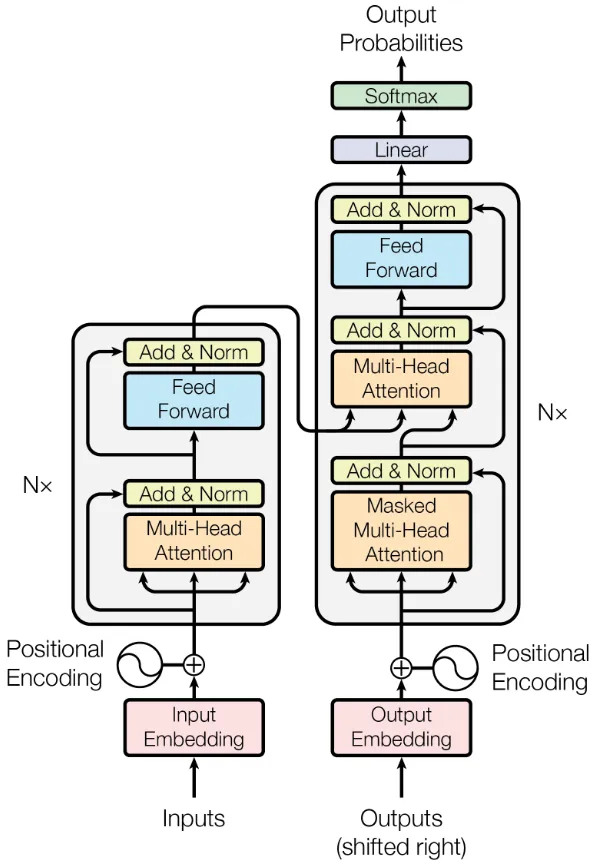

## 代码实现

In [2]:
import torch
import numpy
import torch.nn as nn
import torch.nn.functional as F

## word embedding

以序列模型为例构建序列（如机器翻译），序列的字符用其再词表中的索引的形式表示
考虑 source sentence 和 target sentence

在真实项目中，关键需要拿到词表大小，特征大小方可生成embedding

In [28]:
# batch_size = 2
# src_len = torch.randint(2, 5, (batch_size,)) # randint(low, high, shape)
# tgt_len = torch.randint(2, 5, (batch_size,))

# 句子长度
src_len = torch.tensor([2, 4]).to(torch.int32) # batch_size 个句子，每个句子的长度为张量中数字，这里写死 batch_size = 2
tgt_len = torch.tensor([4, 3]).to(torch.int32)

# 词表大小
max_num_src_words = 8
max_num_tgt_words = 8

# 特征大小
model_dim = 8

# 序列最大长度
max_src_seq_len = 5
max_tgt_seq_len = 5

# 句子索引序列生成
src_seq = [F.pad(torch.randint(1, max_num_src_words, (L,)), (0, max_src_seq_len-L)) for L in src_len] # 词表长度为 8，生成两个句子，每个句子中的元素都是单词在词表中的索引，如 [4, 7] 就是长度为 2 的句子
tgt_seq = [F.pad(torch.randint(1, max_num_tgt_words, (L,)), (0, max_tgt_seq_len-L)) for L in tgt_len] # pad 将长度补齐 (0, max_tgt_seq_len-L)代表左边不补齐，右边补齐代码中长度的 0
src_seq = torch.stack(src_seq) # 变为 batch_size * max_src_seq_len 作为输入
tgt_seq = torch.stack(tgt_seq) # stack(input, dim) 先扩张维度再合并

# embedding，最终生成的 word embedding size = batch_size * seq_len(padding) * 词表大小 
src_embedding_table = nn.Embedding(max_num_src_words+1, model_dim) # 这里 +1 是因为有 pad，咱们写死了序列长度，真实序列长度可能就是词表大小 + padding
tgt_embedding_table = nn.Embedding(max_num_tgt_words+1, model_dim) # embedding_table 留给 pad
src_embedding = src_embedding_table(src_seq)
tgt_embedding = tgt_embedding_table(src_seq)

src_seq.shape, src_embedding.shape

(torch.Size([2, 5]), torch.Size([2, 5, 8]))

## position embedding

$p_{pos, 2i} = \sin(\frac {pos} {10000^{2i/d}}), p_{pos, 2i + 1} = \cos(\frac {pos} {10000^{2i/d}})$

In [33]:
# # 
# max_position_len = 5

# pos_mat = torch.arange(max_position_len).reshape(-1, 1)
# i_mat = torch.arange(0, 2, 8)
# i_mat

tensor([0])